In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv('../data/global_food_wastage_dataset.csv')
print(df.head())
print(df.info())

     Country  Year        Food Category  Total Waste (Tons)  \
0  Australia  2019  Fruits & Vegetables            19268.63   
1  Indonesia  2019        Prepared Food             3916.97   
2    Germany  2022       Dairy Products             9700.16   
3     France  2023  Fruits & Vegetables            46299.69   
4     France  2023            Beverages            33096.57   

   Economic Loss (Million $)  Avg Waste per Capita (Kg)  Population (Million)  \
0                   18686.68                      72.69                 87.59   
1                    4394.48                     192.52               1153.99   
2                    8909.16                     166.94               1006.11   
3                   40551.22                     120.19                953.05   
4                   36980.82                     104.74               1105.47   

   Household Waste (%)  
0                53.64  
1                30.61  
2                48.08  
3                31.91  
4        

In [133]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())


Missing values:
 Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64


In [134]:
# Total food waste by country
total_waste_by_country = df.groupby("Country")["Total Waste (Tons)"].sum().sort_values(ascending=False)
print(total_waste_by_country.head(10))

Country
Turkey       6879885.81
Canada       6790678.49
Spain        6790574.25
Germany      6760053.01
Mexico       6589169.52
USA          6446334.63
China        6411096.18
Brazil       6391752.50
France       6334495.00
Indonesia    6294447.74
Name: Total Waste (Tons), dtype: float64


In [135]:
# Average food waste per capita by year
avg_per_capita_by_year = df.groupby("Year")["Avg Waste per Capita (Kg)"].mean()
print(avg_per_capita_by_year)

Year
2018    108.928150
2019    107.818973
2020    110.850479
2021    107.362166
2022    110.389012
2023    109.681031
2024    111.208890
Name: Avg Waste per Capita (Kg), dtype: float64


In [136]:
# Top 10 countries by economic losses
top_economic_loss = df.groupby("Country")["Economic Loss (Million $)"].sum().sort_values(ascending=False).head(10)
print(top_economic_loss)

Country
Spain        6825152.37
Turkey       6809560.62
Canada       6793901.16
Germany      6730719.94
Mexico       6576477.28
China        6520823.56
USA          6440123.44
Brazil       6295592.19
Indonesia    6275755.68
India        6260349.14
Name: Economic Loss (Million $), dtype: float64


In [137]:
# Annual food waste for the top 3 countries in 2024
top_2024 = df[df["Year"] == 2024].groupby("Country")["Total Waste (Tons)"].sum().sort_values(ascending=False).head(3)
print(top_2024)

Country
Mexico    1140293.74
Italy     1074171.67
Turkey    1052913.58
Name: Total Waste (Tons), dtype: float64


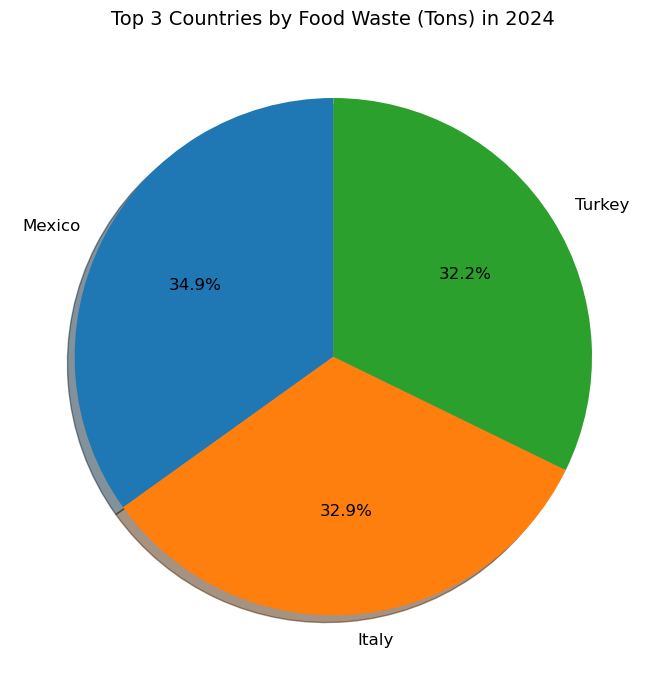

In [138]:
plt.figure(figsize=(7, 7))
top_2024.plot(kind="pie", autopct="%1.1f%%", startangle=90, shadow=True, textprops={'fontsize': 12})
plt.title("Top 3 Countries by Food Waste (Tons) in 2024", fontsize=14)
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
plt.show()


In [139]:
# Household waste percentage by food category
household_waste_by_category = df.groupby("Food Category")["Household Waste (%)"].mean()
print(household_waste_by_category)

Food Category
Bakery Items           50.441095
Beverages              49.445368
Dairy Products         50.676412
Frozen Food            49.895554
Fruits & Vegetables    50.189065
Grains & Cereals       49.403379
Meat & Seafood         50.212992
Prepared Food          50.180450
Name: Household Waste (%), dtype: float64


In [140]:
# Total food waste by category over the years
waste_by_category = df.groupby(["Year", "Food Category"])["Total Waste (Tons)"].sum()
print(waste_by_category)

Year  Food Category      
2018  Bakery Items           2414765.37
      Beverages              2674427.64
      Dairy Products         2084331.79
      Frozen Food            2118631.65
      Fruits & Vegetables    1795141.69
      Grains & Cereals       2053079.41
      Meat & Seafood         2177121.62
      Prepared Food          2307791.38
2019  Bakery Items           2246447.51
      Beverages              2198344.43
      Dairy Products         2613061.43
      Frozen Food            1938199.17
      Fruits & Vegetables    2098901.56
      Grains & Cereals       1790740.17
      Meat & Seafood         2000647.31
      Prepared Food          2641595.03
2020  Bakery Items           2111708.45
      Beverages              2591432.18
      Dairy Products         2073174.72
      Frozen Food            2291251.89
      Fruits & Vegetables    2087406.50
      Grains & Cereals       2010551.56
      Meat & Seafood         2526389.47
      Prepared Food          2436485.59
2021  Bakery I

In [141]:
# Country with the highest food waste for each food category
top_country_by_category = df.loc[df.groupby("Food Category")["Total Waste (Tons)"].idxmax()][["Country", "Food Category", "Total Waste (Tons)"]]
print(top_country_by_category)

        Country        Food Category  Total Waste (Tons)
4724      Spain         Bakery Items            49863.60
2243    Germany            Beverages            49956.72
4813         UK       Dairy Products            49946.21
4561  Australia          Frozen Food            49902.88
3090      Spain  Fruits & Vegetables            49990.76
1611      Spain     Grains & Cereals            49939.30
2856        USA       Meat & Seafood            49989.46
1537      Japan        Prepared Food            49948.23


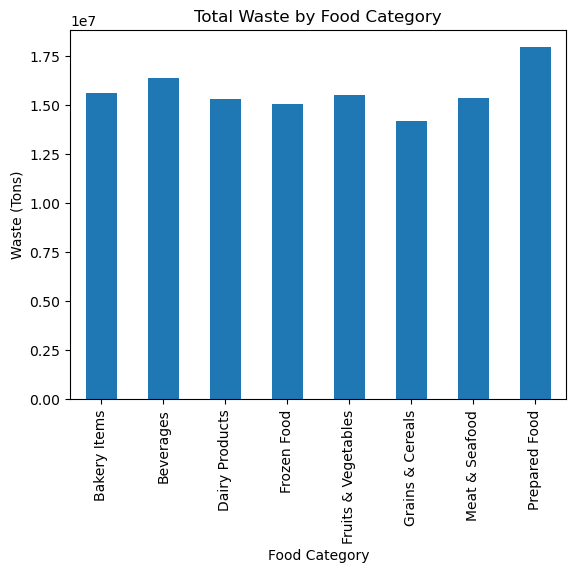

In [142]:
df.groupby("Food Category")["Total Waste (Tons)"].sum().plot(kind="bar")
plt.title("Total Waste by Food Category")
plt.ylabel("Waste (Tons)")
plt.show()

In [143]:
# Yearly food waste trend for a specific country (France)
france_waste = df[df["Country"] == "France"].groupby("Year")["Total Waste (Tons)"].sum()
print(france_waste)

Year
2018     905245.20
2019     547644.07
2020    1076514.93
2021    1032675.97
2022     975411.00
2023    1067878.54
2024     729125.29
Name: Total Waste (Tons), dtype: float64


In [144]:
# The most wasted food category each year
top_category_by_year = df.groupby(["Year", "Food Category"])["Total Waste (Tons)"].sum().groupby(level=0).idxmax()
print(top_category_by_year)

Year
2018              (2018, Beverages)
2019          (2019, Prepared Food)
2020              (2020, Beverages)
2021       (2021, Grains & Cereals)
2022    (2022, Fruits & Vegetables)
2023          (2023, Prepared Food)
2024          (2024, Prepared Food)
Name: Total Waste (Tons), dtype: object


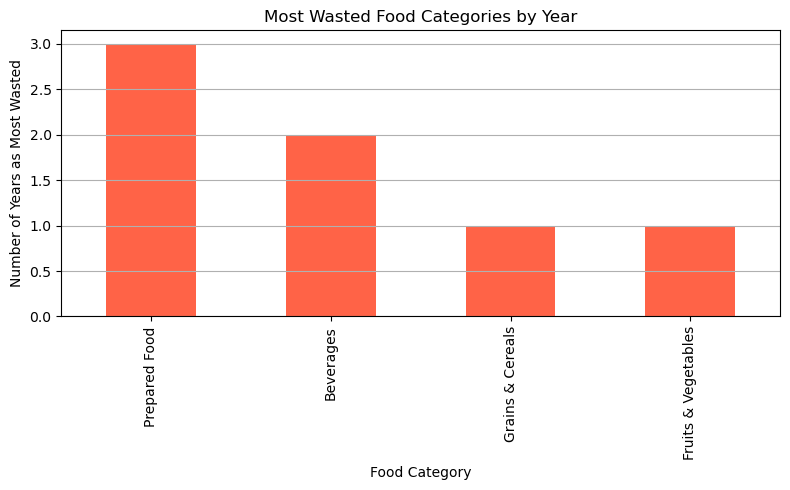

In [145]:
top_df = top_category_by_year.apply(lambda x: pd.Series({'Year': x[0], 'Top Category': x[1]}))
top_counts = top_df['Top Category'].value_counts()
top_counts.plot(kind='bar', color='tomato', figsize=(8,5), title='Most Wasted Food Categories by Year')
plt.xlabel('Food Category')
plt.ylabel('Number of Years as Most Wasted')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [146]:
# Average economic losses per capita
df["Loss per Million"] = df["Economic Loss (Million $)"] / df["Population (Million)"]
avg_loss_per_million = df.groupby("Country")["Loss per Million"].mean().sort_values(ascending=False)
print(avg_loss_per_million.head(10))

Country
France          103.824641
Japan           101.664642
Germany         101.656208
Indonesia        99.103758
Italy            97.029841
Turkey           96.718152
South Korea      94.838855
Saudi Arabia     93.803891
Mexico           92.992289
Australia        90.832126
Name: Loss per Million, dtype: float64


In [147]:
# Proportion of household food waste relative to total food waste
df["Household Waste (Tons)"] = df["Total Waste (Tons)"] * (df["Household Waste (%)"] / 100)
household_vs_total = df.groupby("Country")[["Household Waste (Tons)", "Total Waste (Tons)"]].sum()
print(household_vs_total)

              Household Waste (Tons)  Total Waste (Tons)
Country                                                 
Argentina               3.079261e+06          6082367.52
Australia               2.852887e+06          5887361.29
Brazil                  3.197079e+06          6391752.50
Canada                  3.332876e+06          6790678.49
China                   3.217897e+06          6411096.18
France                  3.172209e+06          6334495.00
Germany                 3.362871e+06          6760053.01
India                   3.202413e+06          6245313.77
Indonesia               3.320863e+06          6294447.74
Italy                   2.991750e+06          6207707.28
Japan                   2.946452e+06          5907491.06
Mexico                  3.352065e+06          6589169.52
Russia                  2.932512e+06          5832689.46
Saudi Arabia            3.002368e+06          5983283.87
South Africa            2.979432e+06          6056470.30
South Korea             2.80267

In [148]:
# Country with the highest per capita annual food waste
top_per_capita = df.groupby(["Year", "Country"])["Avg Waste per Capita (Kg)"].mean().groupby(level=0).idxmax()
print(top_per_capita)

Year
2018          (2018, Canada)
2019           (2019, Italy)
2020          (2020, Mexico)
2021         (2021, Germany)
2022       (2022, Australia)
2023       (2023, Argentina)
2024    (2024, Saudi Arabia)
Name: Avg Waste per Capita (Kg), dtype: object


In [149]:
# Change in food waste between 2018 and 2024 for each country
waste_change = df[df["Year"].isin([2018, 2024])].groupby(["Country", "Year"])["Total Waste (Tons)"].sum().unstack().pct_change(axis=1).iloc[:, -1]
print(waste_change.sort_values(ascending=False))

Country
Australia       0.528416
Russia          0.405943
UK              0.379922
Italy           0.251742
Canada          0.226015
South Korea     0.170164
South Africa    0.156926
Spain           0.152035
Mexico          0.099168
Saudi Arabia    0.075742
Argentina       0.060618
Japan           0.058290
Indonesia       0.040332
Turkey         -0.051802
Brazil         -0.085866
USA            -0.108919
Germany        -0.131689
China          -0.168480
France         -0.194555
India          -0.462654
Name: 2024, dtype: float64


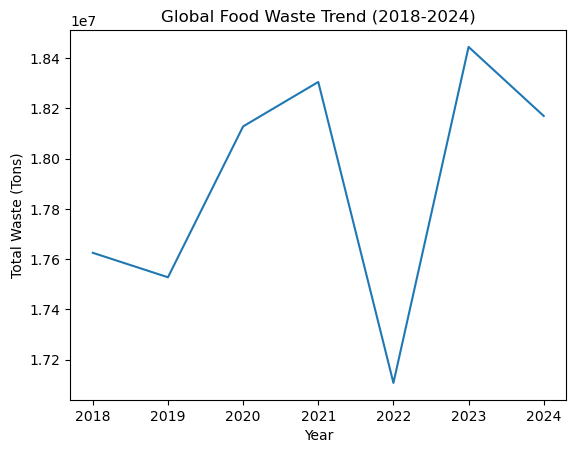

In [150]:
# Global Food Waste Trend (2018-2024)
global_waste_trend = df.groupby("Year")["Total Waste (Tons)"].sum()
global_waste_trend.plot(kind="line")
plt.title("Global Food Waste Trend (2018-2024)")
plt.ylabel("Total Waste (Tons)")
plt.show()

In [151]:
# Gap between economic losses and total food waste by country
df["Loss vs Waste"] = df["Economic Loss (Million $)"] - (df["Total Waste (Tons)"] / 1000)
loss_gap = df.groupby("Country")["Loss vs Waste"].mean()
print(loss_gap.sort_values(ascending=False))

Country
Canada          26720.907408
Turkey          26572.971618
Australia       26203.105083
Mexico          26174.853030
France          26098.882741
Argentina       25742.872153
Indonesia       25694.513247
Saudi Arabia    25151.477139
USA             25033.763056
Spain           24884.532101
China           24864.169709
South Africa    24709.575427
Italy           24506.394398
Russia          24505.139454
Japan           24491.898704
Brazil          24376.745882
India           24335.034343
UK              23721.474745
Germany         23428.431662
South Korea     23371.280718
Name: Loss vs Waste, dtype: float64


Top 5 Food Categories by Economic Losses:
 Food Category
Prepared Food          17878643.94
Beverages              16331179.83
Fruits & Vegetables    15622033.18
Bakery Items           15536973.93
Meat & Seafood         15352228.39
Name: Economic Loss (Million $), dtype: float64


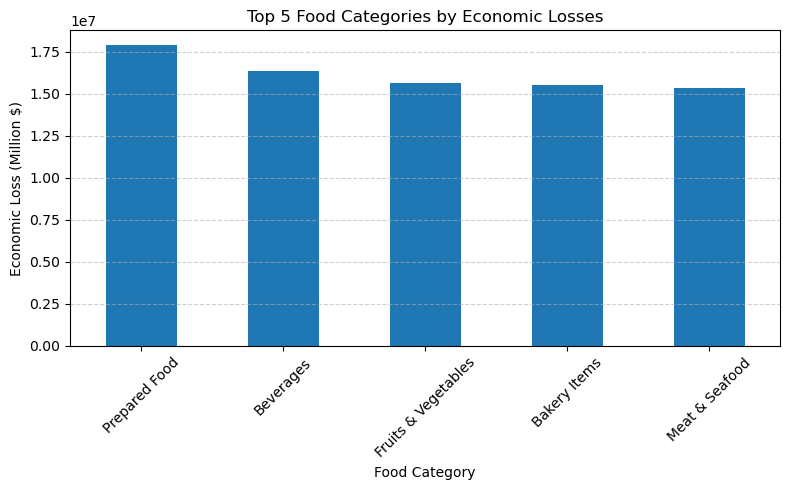

In [152]:
#Top 5 Food Categories by Total Economic Losses
top_loss_by_category = df.groupby("Food Category")["Economic Loss (Million $)"]\
                         .sum().sort_values(ascending=False).head(5)
print("Top 5 Food Categories by Economic Losses:\n", top_loss_by_category)


plt.figure(figsize=(8, 5))
top_loss_by_category.plot(kind='bar')
plt.title('Top 5 Food Categories by Economic Losses')
plt.xlabel('Food Category')
plt.ylabel('Economic Loss (Million $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [153]:
# Countries with the highest increase in food waste between 2018 and 2024
waste_increase = df[df["Year"] == 2024].groupby("Country")["Total Waste (Tons)"].sum() - df[df["Year"] == 2018].groupby("Country")["Total Waste (Tons)"].sum()
print(waste_increase.sort_values(ascending=False).head(10))

Country
Australia       297092.85
UK              249772.59
Russia          245900.85
Italy           216030.34
Canada          181450.33
South Africa    131427.31
Spain           130106.86
South Korea     119463.25
Mexico          102877.97
Saudi Arabia     71433.33
Name: Total Waste (Tons), dtype: float64


In [154]:
# Household food waste as a percentage relative to population size
df["Household Waste per Capita"] = df["Avg Waste per Capita (Kg)"] * (df["Household Waste (%)"] / 100)
household_per_capita = df.groupby("Country")["Household Waste per Capita"].mean()
print(household_per_capita.sort_values(ascending=False))

Country
Germany         58.323099
Saudi Arabia    58.025658
Russia          56.253501
Argentina       56.003710
India           55.808224
USA             55.561077
France          55.533548
Mexico          55.266819
South Korea     55.231903
China           55.005239
Indonesia       54.887531
Italy           54.220272
Japan           54.180915
Brazil          54.093342
Canada          54.028305
Turkey          53.682583
Australia       52.450947
Spain           51.971713
South Africa    51.797944
UK              50.960580
Name: Household Waste per Capita, dtype: float64


In [155]:
# Impact of population size on total food waste
df["Waste per Person"] = df["Total Waste (Tons)"] / df["Population (Million)"]
waste_per_person = df.groupby("Country")["Waste per Person"].mean().sort_values(ascending=False)
print(waste_per_person.head(10))

Country
France          103.824878
Germany         103.093180
Japan           102.142885
Indonesia       102.005684
Turkey           97.590312
Saudi Arabia     96.741869
Italy            96.057953
Australia        92.477570
South Korea      91.996229
Mexico           90.614157
Name: Waste per Person, dtype: float64


In [156]:
# Top country in each food category by economic losses
top_loss_country = df.loc[df.groupby("Food Category")["Economic Loss (Million $)"].idxmax()][["Country", "Food Category", "Economic Loss (Million $)"]]
print(top_loss_country)

           Country        Food Category  Economic Loss (Million $)
4663     Argentina         Bakery Items                   57744.19
4444  South Africa            Beverages                   59029.87
928         Turkey       Dairy Products                   58558.02
3734        Turkey          Frozen Food                   58171.65
1952         India  Fruits & Vegetables                   59228.93
1200     Argentina     Grains & Cereals                   58225.68
1612         India       Meat & Seafood                   57327.57
1963            UK        Prepared Food                   56999.64


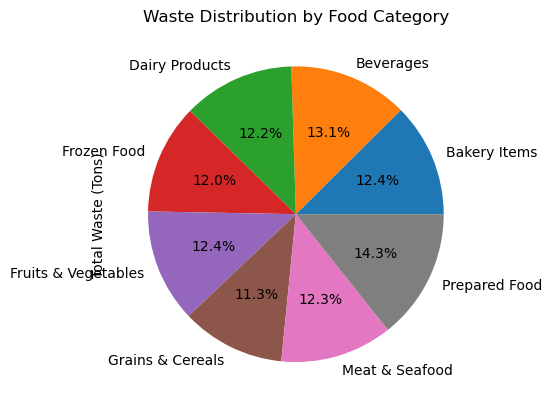

In [157]:
df.groupby("Food Category")["Total Waste (Tons)"].sum().plot(kind="pie", autopct='%1.1f%%')
plt.title("Waste Distribution by Food Category")
plt.show()

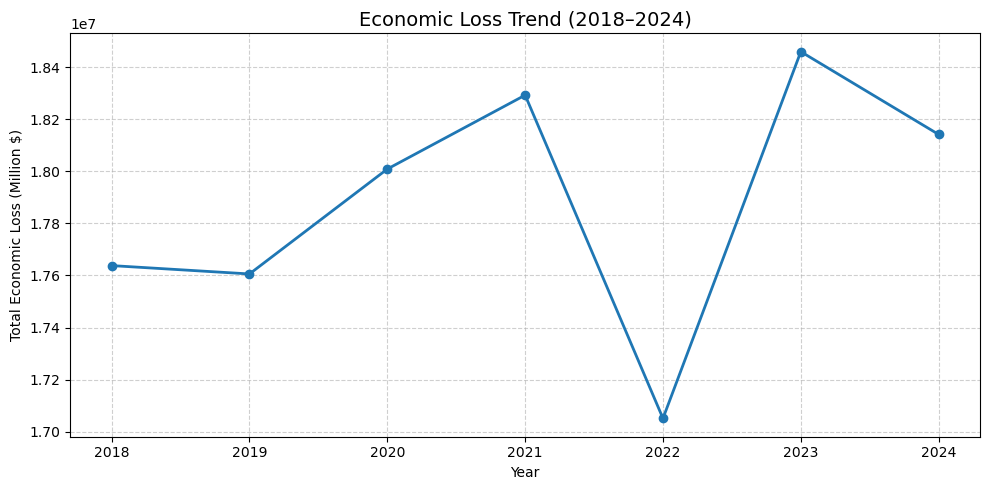

In [158]:
#Economic Loss Trend (2018–2024)
economic_trend = df.groupby("Year")["Economic Loss (Million $)"].sum()

plt.figure(figsize=(10, 5))
plt.plot(economic_trend.index, economic_trend.values, marker='o', linewidth=2)
plt.title("Economic Loss Trend (2018–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Economic Loss (Million $)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(economic_trend.index)  
plt.tight_layout()
plt.show()


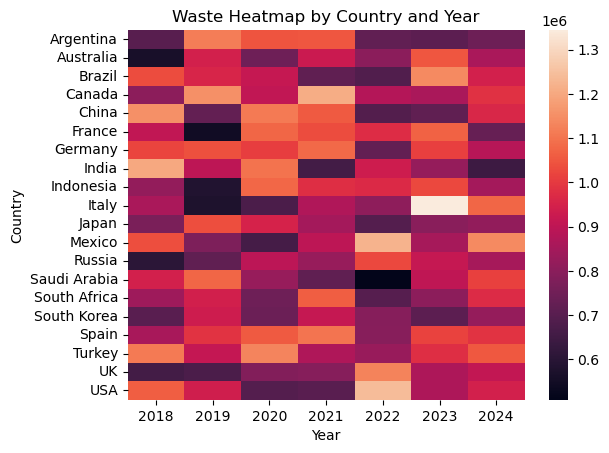

In [159]:
pivot = df.pivot_table(values="Total Waste (Tons)", index="Country", columns="Year", aggfunc="sum", fill_value=0)
sns.heatmap(pivot)
plt.title("Waste Heatmap by Country and Year")
plt.show()